In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #manipulação de dados
from sklearn import metrics
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
#lendo os dados
bd = pd.read_csv('sic-rotulado.csv')

#verificando as 5 primeiras linhas
bd.head()

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,NeighborhoodConnectivity,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,Stress,TopologicalCoefficient,Role
0,7.284477,0.003115,0.137278,0.214286,24,14,False,3.000000,24,8,0.934537,421940,0.250000,1
1,7.285516,0.001038,0.137259,0.400000,16,14,False,4.000000,16,5,0.934526,210960,0.333333,1
2,6.289328,0.005531,0.159000,0.466667,12,13,False,7.833333,12,6,0.944903,773476,0.290123,2
3,5.621275,0.007808,0.177896,0.181818,30,13,False,8.750000,30,12,0.951862,1181032,0.128676,1
4,5.477131,0.000479,0.182577,0.523810,16,13,False,22.285714,16,7,0.953363,121978,0.327731,2


In [3]:
bd.shape

(1121, 14)

<AxesSubplot:>

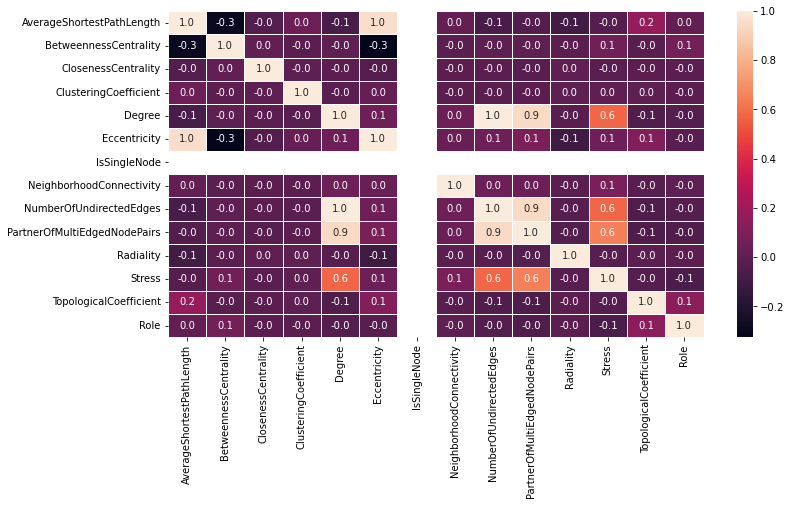

In [4]:
correlation = bd.corr()
plt.figure(figsize=(12,6))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [5]:
#X recebe todos os dados
X = bd.iloc[:,:-1].values

#y recebe apenas a coluna role
y = bd.iloc[:,13].values

In [6]:
X

array([[7.284476784476785, 0.0031153804117408, 0.1372782190933739, ...,
        0.9345367001617002, 421940, 0.25],
       [7.285516285516286, 0.0010376994779074, 0.1372586321696946, ...,
        0.934525872025872, 210960, 0.3333333333333333],
       [6.289327789327789, 0.0055305538841067, 0.1589995041595504, ...,
        0.9449028355278356, 773476, 0.2901234567901234],
       ...,
       [5.802841302841303, 0.0, 0.1723293724249119, ...,
        0.9499704030954031, 0, 0.3703703703703703],
       [10.327789327789327, 0.0, 0.0968261423874387, ...,
        0.9028355278355278, 0, 0.6666666666666666],
       [10.327789327789327, 0.0, 0.0968261423874387, ...,
        0.9028355278355278, 0, 0.6666666666666666]], dtype=object)

In [7]:
y

array([1, 1, 2, ..., 2, 2, 2], dtype=int64)

In [8]:
vetor = list(range(30))

for v in range(30):   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)


    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    classifier = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=2000)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    vetor[v] = metrics.accuracy_score(y_test, y_pred)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6102449888641426


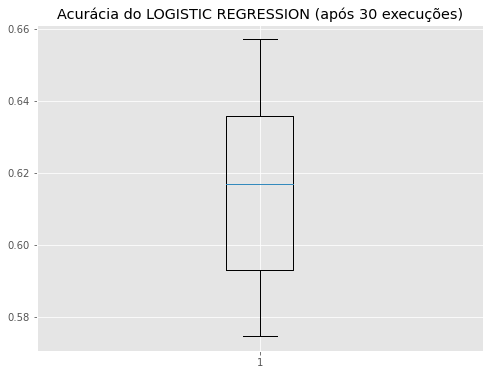

In [10]:
from importlib import reload
reload(plt) #recarregando configurações do plt (erro no gráfico)

plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.boxplot(vetor)
plt.title('Acurácia do LOGISTIC REGRESSION (após 30 execuções)');

In [11]:
#acuracia média em 62%, baixa, e pode ser melhorada, minha hipotese é diminuir a quantidade de dados
#ultilizados removendo valores que podem causar vies na analise 

In [12]:
#conta ocorrências da coluna Role por atributo
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{1: 492,
 2: 526,
 7: 58,
 8: 3,
 9: 1,
 1002: 5,
 1004: 1,
 1006: 1,
 1009: 3,
 1010: 11,
 1011: 2,
 1012: 1,
 1013: 1,
 1015: 1,
 1033: 1,
 1035: 2,
 1041: 4,
 1042: 1,
 1045: 2,
 1052: 2,
 1056: 1,
 1060: 1,
 1065: 1}

In [13]:
unique

array([   1,    2,    7,    8,    9, 1002, 1004, 1006, 1009, 1010, 1011,
       1012, 1013, 1015, 1033, 1035, 1041, 1042, 1045, 1052, 1056, 1060,
       1065], dtype=int64)

In [14]:
counts

array([492, 526,  58,   3,   1,   5,   1,   1,   3,  11,   2,   1,   1,
         1,   1,   2,   4,   1,   2,   2,   1,   1,   1], dtype=int64)

In [15]:
unique_list = unique.tolist()
counts_list = counts.tolist()
type(counts_list)

list

In [16]:
unique_df = pd.DataFrame(unique) 
counts_df = pd.DataFrame(counts)

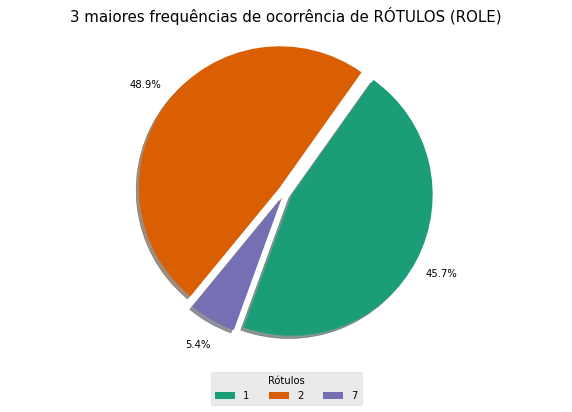

In [17]:
label = unique_df[0].head(3).value_counts().index 
fig1, ax1 = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal")) 
color = sns.color_palette('Dark2', 5) 
ax1.pie(counts_df[0].head(3), explode=(0.05, 0.05, 0.05), pctdistance=1.2,autopct='%1.1f%%', colors=color, shadow=True, startangle=250) 
ax1.axis('equal') 
ax1.set_title("3 maiores frequências de ocorrência de RÓTULOS (ROLE)", fontsize=15) 
plt.legend(title = "Rótulos", labels=label, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=5) 
plt.show() #gráfico de porcentagem

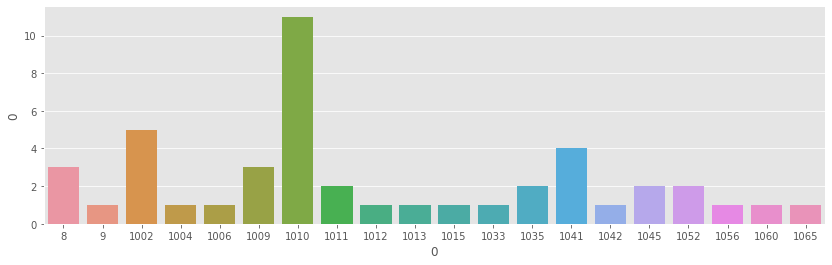

In [18]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x=unique_df[0].tail(20), y=counts_df[0].tail(20))

plt.show()

In [19]:
#crio um novo Banco De Dados, neste seleciono os dados que somente apresentam na coluna ROLE os valores 1,2,7
#por serem os que mais se repetem
bd_mascara = bd['Role'].isin([1,2,7]) 
bd_filtrado = bd[bd_mascara]

In [20]:
#separar meu índice do meu conjunto de teste
X = bd_filtrado.iloc[:,:-1].values
y = bd_filtrado.iloc[:,-1].values

In [21]:
vetor = list(range(30))

for v in range(30):   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)


    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    classifier = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=2000)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    vetor[v] = metrics.accuracy_score(y_test, y_pred)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.665893271461717


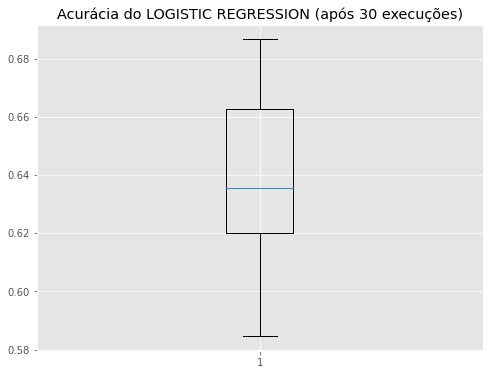

In [23]:
from importlib import reload
reload(plt) #recarregando configurações do plt (erro no gráfico)

plt.figure(figsize=(8,6))
plt.style.use('ggplot')
plt.boxplot(vetor)
plt.title('Acurácia do LOGISTIC REGRESSION (após 30 execuções)');